                                                                                                        Regis Ouedraogo

  # HOMEWORK 5        
  # K-NN Algorithm    

 

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [58]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url)
df.columns = [ "Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


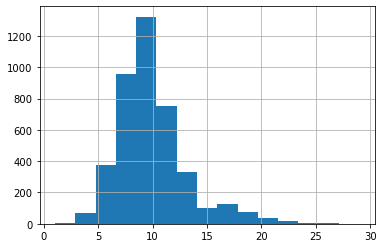

In [59]:
#lets drop the Sex column as it is categorical
df = df.drop("Sex", axis=1)
df["Rings"].hist(bins=15)
plt.show()
#df

In [60]:
#lets check for corrolation
correlation_matrix = df.corr()
correlation_matrix["Rings"]

Length            0.557123
Diameter          0.575005
Height            0.558109
Whole weight      0.540818
Shucked weight    0.421256
Viscera weight    0.504274
Shell weight      0.628031
Rings             1.000000
Name: Rings, dtype: float64

In [61]:
X = df[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]].to_numpy()

y = df["Rings"].to_numpy()

---

**Remark**: In machine learning we fit the model to the **training data** and we choose optimal hyper-parameters using the **validation data**. Then with those choices of hyper-parameters, we fit the model again to the training data, and we evaluate and report model prformance on the **test data**. 

---

In [62]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [63]:
X_train.shape

(2505, 7)

In [64]:
X_valid.shape

(835, 7)

In [65]:
X_test.shape

(836, 7)

In [66]:
# We define Euclidean distance function

def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between X_train[0] and X_train[1] is {distance(X_train[0], X_train[1])}")

The distance between X_train[0] and X_train[1] is 0.09659710140578757


In [67]:
# We define a function that will create a list of k nearest neighbors from the training data set to a given test point
# For each such neighbor, this list will store: features of that neighbor, its label, and its distance to the test point

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):

    neighbors = []
    
    for p, l in zip(training_features, training_labels):
        d = distance(point, p)
        info = [p, l, d]
        neighbors.append(info)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [68]:
# Check the k_nearest_neighbors function for a test data point

k_nearest_neighbors(X_test[0], X_train, y_train, 7)

[[array([0.63  , 0.515 , 0.16  , 1.336 , 0.553 , 0.3205, 0.35  ]),
  11,
  0.07642316402766897],
 [array([0.66 , 0.505, 0.165, 1.374, 0.589, 0.351, 0.345]),
  10,
  0.07961940718191765],
 [array([0.62  , 0.465 , 0.19  , 1.3415, 0.5705, 0.3175, 0.355 ]),
  11,
  0.08369289097647416],
 [array([0.645 , 0.505 , 0.165 , 1.318 , 0.55  , 0.3015, 0.335 ]),
  11,
  0.08508525136590932],
 [array([0.63  , 0.485 , 0.17  , 1.3205, 0.5945, 0.345 , 0.345 ]),
  9,
  0.08942734481130464],
 [array([0.615 , 0.51  , 0.15  , 1.296 , 0.545 , 0.3315, 0.32  ]),
  9,
  0.0908542789306038],
 [array([0.625 , 0.515 , 0.17  , 1.331 , 0.5725, 0.3005, 0.361 ]),
  9,
  0.09106728281880373]]

In [69]:
y_test[0]

12

In [70]:
# We write a function that makes prediction for both classification and regression

def knn_predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    labels = [x[1] for x in neighbors]
    
    if regression == False:
        return max(labels, key = labels.count)
    else:
        return sum(x[1] for x in labels)/k

In [71]:
# Check this function

knn_predict(X_test[0], X_train, y_train, 7)

11

In [72]:
def accuracy(test_features, 
             test_labels,
             training_features, 
             training_labels,
             k):
    
    correct = 0
    for point, label in zip(test_features, test_labels):
        correct += label == knn_predict(point, 
                                        training_features, 
                                        training_labels, 
                                        k)
    return correct/len(test_features)

In [73]:
# Check  this function

accuracy(X_valid, y_valid, X_train, y_train, 7)

0.20479041916167665

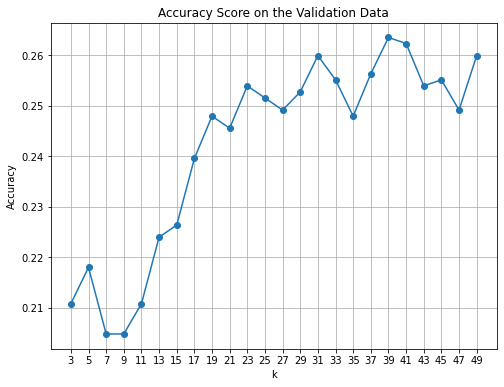

In [74]:
#k_values = [k for k in range(3, 25, 2)]
k_values = [k for k in range(3, 50, 2)]
accuracy_values = [accuracy(X_valid,
                            y_valid,
                            X_train,
                            y_train, k) for k in k_values]

plt.figure(figsize = (8, 6))

plt.plot(k_values, accuracy_values, marker = "o")
plt.title('Accuracy Score on the Validation Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid();

In [75]:
# We choose the optimal value for k from the above graph, 
# we fit the model again on the training data and 
# we report the error on the test data

accuracy(X_test, y_test, X_train, y_train, 39)

# We get better accuracy using higher k!
# Accuracy for k= 25 was 0.21! 

0.2679425837320574

## 2) Use sklearn to implement K-NN 

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df[[ "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]].to_numpy()

y = df["Rings"].to_numpy()

In [100]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [101]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [102]:
y_pred = model.predict(X_valid)
y_pred

array([10,  7,  7, 10,  3,  7,  8, 10, 10, 10, 13,  9, 15,  9,  7, 10, 12,
        9, 12, 10,  5,  9,  6,  4,  6,  6,  6, 10, 11, 10,  9,  9,  7,  7,
        8,  7, 11,  9,  8,  5, 10,  9, 10,  9,  9,  6,  8, 15, 11, 11, 14,
        9,  8,  9, 10,  9,  9, 10, 11,  7, 10, 10,  5,  7, 17, 11,  9,  6,
        8,  9,  5, 10,  9, 10, 11,  8,  6,  8,  8,  9,  7,  9,  7,  9, 12,
        9,  9, 13, 11, 10,  7,  9,  7,  7, 13, 10,  9,  9,  9,  7,  6,  9,
        5,  6,  6,  9,  6,  7,  5,  9, 11,  7,  9,  8, 10, 10,  7,  9,  8,
        9, 10, 10, 10,  9, 10,  9,  8,  7,  8,  7, 10,  7,  8,  9, 13,  8,
       11,  4,  6, 10, 10,  8, 10,  9,  8,  6,  5, 10,  8,  8,  8,  9,  8,
        4,  8,  9,  6,  8,  7, 18,  7, 11,  8,  7, 16, 10,  9,  8,  8, 11,
        7,  9,  5,  9,  7, 10,  7, 11,  9,  8,  9,  7,  8, 10,  6,  8, 10,
        7,  8,  9,  5, 10,  9,  8, 13, 11,  9, 11,  6, 10,  9,  9, 10,  7,
       10, 10, 12,  9, 10,  9, 10,  5,  7,  9,  8,  3,  9,  7, 10, 16,  8,
       10,  9,  6,  8,  4

In [103]:
accuracy_score(y_valid, y_pred)

0.20239520958083831

In [107]:
cm = confusion_matrix(y_valid, y_pred)
cm


array([[ 0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  2,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  3,  8,  1,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 12, 13, 16,  3,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  4, 15, 27, 26, 11,  2,  1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 11, 24, 32, 30, 15,  4,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3, 14, 37, 40, 29,  6,  1,  4,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  6, 21, 52, 24, 19,  2,  1,  1,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  6, 13, 34, 29, 18,  1,  4,  0,  0,  1,  1,  0,
         0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  7, 17, 15, 10,  2,  3,  0,

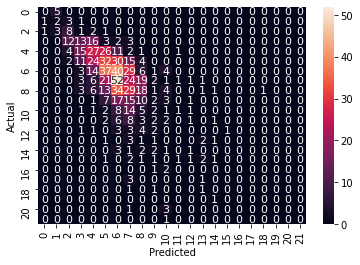

In [106]:
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":11},
           )
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [30]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.20      0.29      0.24         7
           5       0.28      0.50      0.36        16
           6       0.25      0.27      0.26        49
           7       0.28      0.31      0.29        87
           8       0.22      0.27      0.24       118
           9       0.19      0.30      0.24       134
          10       0.16      0.18      0.17       131
          11       0.24      0.16      0.19       111
          12       0.11      0.04      0.05        56
          13       0.05      0.03      0.03        36
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        15
          16       0.25      0.22      0.24         9
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00        10
          19       0.00      0.00      0.00         3
          20       0.00    

C:\Users\pawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pawn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


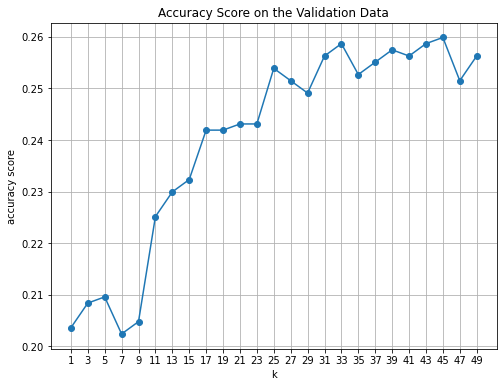

In [31]:
k_values = []
acc_score = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_score.append(accuracy_score(y_valid, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [32]:
m = max(acc_score)
m

0.25988023952095807

In [33]:
k_values[acc_score.index(m)]

45

In [34]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.2583732057416268

## 3) Use GridSearchCV and RandomizedSearchCV to select hyper-parameters

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [36]:
X = df[["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]].to_numpy()

y = df["Rings"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

C:\Users\pawn\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.25149701, 0.23203593, 0.25299401, 0.26047904, 0.23652695])

[0.25 0.23 0.25 0.26 0.24]
Average accuracy: 0.2467065868263473
Accuracy standard deviation: 0.01068656784285913


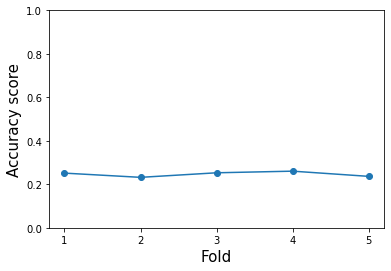

In [38]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());  

In [39]:
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

C:\Users\pawn\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.04521074, 0.01177478, 0.01606874, 0.01332402, 0.01214342,
        0.01663246, 0.01264958, 0.01749902, 0.01128778, 0.01253023,
        0.01254454, 0.0150785 , 0.01810045, 0.01365094, 0.01789818,
        0.01432858, 0.01027241, 0.0171886 , 0.01698208, 0.01332316,
        0.02049823, 0.01923828, 0.02477965, 0.01833982, 0.02103601,
        0.01474705, 0.01202278, 0.01455398, 0.01295953, 0.01232672,
        0.02494516, 0.01301432, 0.0194931 , 0.01903844, 0.01264229,
        0.01052141, 0.01373162, 0.01424832, 0.0168714 , 0.01024842,
        0.01567965, 0.01548901, 0.01521869, 0.01348376, 0.01590142,
        0.01738153, 0.01558995, 0.0160552 , 0.01541882, 0.01550102,
        0.04525056, 0.02291236, 0.03819461, 0.01338592, 0.01370358,
        0.01874833, 0.03186722, 0.02600288, 0.0144762 , 0.01649318,
        0.01826992, 0.02060394, 0.02324815, 0.0137898 , 0.01913276,
        0.05635581, 0.01365585, 0.03027711, 0.00934453, 0.01606026,
        0.01603408, 0.01114116,

In [40]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045211,0.062072,0.140177,0.027657,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.200599,0.205090,0.230539,0.194611,0.227545,0.211677,0.014594,196
1,0.011775,0.006053,0.015217,0.009100,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.200599,0.205090,0.230539,0.194611,0.227545,0.211677,0.014594,196
2,0.016069,0.007885,0.151929,0.050141,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.220060,0.206587,0.211078,0.202096,0.215569,0.211078,0.006351,198
3,0.013324,0.003946,0.022704,0.003876,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.220060,0.206587,0.211078,0.202096,0.215569,0.211078,0.006351,198
4,0.012143,0.003144,0.137589,0.015142,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.239521,0.242515,0.232036,0.193114,0.232036,0.227844,0.017849,188


In [41]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_score", "rank_test_score"]].head(10)

,param_n_neighbors,param_weights,param_p,mean_test_score,rank_test_score
0,1,uniform,1,0.211677,196
1,1,distance,1,0.211677,196
2,1,uniform,2,0.211078,198
3,1,distance,2,0.211078,198
4,2,uniform,1,0.227844,188
5,2,distance,1,0.211976,195
6,2,uniform,2,0.231138,186
7,2,distance,2,0.211078,198
8,3,uniform,1,0.226946,190
9,3,distance,1,0.226647,191


In [42]:
gs.best_score_

0.28383233532934127

In [43]:
gs.best_params_

{'n_neighbors': 44, 'p': 1, 'weights': 'distance'}

In [44]:
y_pred = gs.predict(X_test)
accuracy_score(y_test, y_pred)

0.2715311004784689

In [45]:
rs = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_train, y_train)

rs.best_score_

C:\Users\pawn\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.2751497005988024

In [46]:
rs.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 35}

In [47]:
y_pred = rs.predict(X_test)
accuracy_score(y_test, y_pred)

0.26913875598086123

##  4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

In [48]:
pip install mlxtend

In [84]:
from mlxtend.plotting import plot_decision_regions

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([ 6,  8,  9, ...,  8,  9, 11], dtype=int64)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
k=50                     # try k=50
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [88]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.2679425837320574

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#lets evaluate the prediction error on the training data
train_preds = model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

2.633501346367107

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#lets evaluate the prediction error on the test data
test_preds = model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.7675062617979584

In [91]:
#Since both training and testing error are almost the same we can infer that the model is performing adequately

In [92]:
import numpy as np
plot_decision_regions(X_train.to_numpy(), y_train, clf = model) # change to test data
plt.title(f"Decision Regions using {k}-NN and the Test Data");

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [93]:
plot_decision_regions(X_train.to_numpy(), y_train, clf = model) # change to test data

plt.title(f"Decision Regions using {k}-NN and the Test Data");

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'